# System Reccomendation : Anime Reccomendation
- **Nama:** HILMI DATU ALLAM
- **Email:** hilmi.allam@gmail.com
- **ID Dicoding:** datuallam

- **Dataset:** https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database?select=anime.csv




# Domain Proyek
Anime merupakan salah satu konten yang paling banyak dikonsumsi. Anime baru terus bertambah setiap tahun membuat pengguna kesulitan menemukan tontonan yang sesuai dengan preferensi mereka, dan hal ini berdampak langsung pada keberhasilan bisnis platform penyedia konten. Dengan menghadirkan sistem rekomendasi yang efektif dan personal, platform dapat meningkatkan retensi pengguna dan durasi waktu menonton, yang pada akhirnya mendorong pertumbuhan pendapatan. Studi dari Netflix menunjukkan bahwa lebih dari 80% tontonan berasal dari sistem rekomendasi, menjadikannya komponen vital dalam strategi bisnis digital mereka [1]. Selain itu, sistem ini juga membuka peluang monetisasi melalui iklan tertarget dan promosi konten eksklusif berbasis minat pengguna. MyAnimeList telah mencatat lebih dari 10.000 judul anime dalam databasenya [2], maka kehadiran sistem penyaring cerdas sangat diperlukan untuk menciptakan pengalaman pengguna yang efisien dan memuaskan. Menurut Ricci et al.[3], sistem rekomendasi yang baik dapat menjadi alat bisnis strategis yang tidak hanya meningkatkan kepuasan pengguna, tetapi juga memperkuat loyalitas dan nilai ekonomi jangka panjang.

# Mengapa masalah ini harus diselesaikan
 1. Pendorong Pertumbuhan Pendapatan Bisnis
 2. Penciptaan Pengalaman Pengguna yang Efisien dan Memuaskan

# Business Understanding

## Problem Statements

Rumusan masalah dari masalah latar belakang diatas adalah
  1. bagaimana pesebaran anime berdasarkan genre dan type distribution
  2. bagaimana member komunitas mempengaruhi rating
  3. bagaimana cara membuat sistem rekomendasi terbaik yang dapat diimplesikan ?

## GOALS

Berdasarkan problem statements, berikut tujuan dibuatnya proyek ini.
  1. Mengetahui persebaran anime berdasarkan genre dan type distribution
  2. Mengetahui member komunitas anime
  3. Menggunakan algoritma cosine similiarity maupun pemodelan machine learning untuk membuat sistem rekomendasi, lalu mengevaluasi menggunakan

## Solution Statements


1. Mengimplementasikan Exploratory Data Analysis (EDA) untuk analisis dan visualisasi data.
2. Mengimplementasikan content-based filtering approach menggunakan algoritma cosine similarity.
3. Mengimplementasikan collaborative-based filtering approach menggunakan algoritma deep learning.
4. Evaluasi Performa Model setelah model dibangun, evaluasi performa akan dilakukan menggunakan metrik seperti Precision dan Root Mean Squared Error. Ini akan memberikan wawasan tentang efektivitas model dalam merekomendasikan anime yang relevan kepada pengguna.

# Data Understanding

## 1. Mengimport Library


Pada bagian ini kita mengimport seluruh library yang diperlukan untuk menganalisis

In [1]:
!pip install kaggle

In [2]:
!pip install keras


In [3]:
!pip install tensorflow

In [69]:
import os
import shutil
import zipfile
import textwrap
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report
import re


## Data Loading

In [5]:
# Import module yang disediakan google colab untuk kebutuhan upload file credentials
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bangdatu","key":"95a4cc85b69be7841ca3ad0ae87e80d7"}'}

In [6]:

# Buat folder .kaggle jika belum ada
os.makedirs('/root/.kaggle', exist_ok=True)

# Pindahkan file ke folder .kaggle
shutil.move('kaggle.json', '/root/.kaggle/kaggle.json')

# Ubah izin file agar hanya bisa diakses oleh owner
os.chmod('/root/.kaggle/kaggle.json', 600)




In [7]:
#Download dataset
!kaggle datasets download -d CooperUnion/anime-recommendations-database


Dataset URL: https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database
License(s): CC0-1.0
anime-recommendations-database.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
with zipfile.ZipFile("anime-recommendations-database.zip", "r") as zip_ref:
    zip_ref.extractall("dataset")

# List files in the current directory
os.listdir("dataset")

['rating.csv', 'anime.csv']

In [9]:
rating=pd.read_csv("dataset/rating.csv")
anime=pd.read_csv("dataset/anime.csv")

In [10]:
rating.head(10)


,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
5,1,355,-1
6,1,356,-1
7,1,442,-1
8,1,487,-1
9,1,846,-1


In [11]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


Csv yang akan kita pakai adalah anime.csv dan rating.csv. 2 csv ini memberikan informasi berupa detail dari anime dan review masing-masing user.

### Deskripsi Variabel

arti variabel rating.csv

Variabel | Keterangan
----------|----------
user_id | nomor unik masing-masing user
anime_id | nomor unik masing-masing anime di MyAnimeList
rating | (-1 menandakan tidak rating walaupun menonton) rating user dari 10



arti variabel anime.csv

Variabel | Keterangan
----------|----------
anime_id | nomor unik masing-masing anime di MyAnimeList
name | nama lengkap anime
genre | daftar genre yang dipisahkan oleh koma
type | movie, TV, OVA, etc
episodes | berapa jumlah episode
rating | rata-rata rating dari 10
members | jumlah member komunitas anime baris ini



#### Menampilkan tipe variable rating

In [12]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [13]:
print(f"Jumlah baris: {rating.shape[0]}\nJumlah kolom: {rating.shape[1]}")

Jumlah baris: 7813737
Jumlah kolom: 3


Semua variabel bertipe int64 dan baris pada data berjumlah 7813737 denngan 3 kolom

Menampilkan tipe variable anime

In [14]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [15]:
print(f"Jumlah baris: {anime.shape[0]}\nJumlah kolom: {anime.shape[1]}")

Jumlah baris: 12294
Jumlah kolom: 7


terdapat 4 tipe data objek yaitu name, genre, type dan episodes. 2 tipe data int64 yaitu anime_id dan members dan 1 tipe data float64 yaitu rating. Baris pada data sejumlah 12294 dengan 7 kolom

#### Mengecek Duplikat

In [16]:
rating.duplicated().sum()

np.int64(1)

In [17]:
anime.duplicated().sum()

np.int64(0)

Terdapat 1 data duplikat pada data rating

#### Mengecek missing value

In [18]:
pd.DataFrame({'Nilai yang Kosong':rating.isnull().sum()})



,Nilai yang Kosong
user_id,0
anime_id,0
rating,0


Memeriksa kolom rating yang -1 yaitu user tidak memberikan rating. implicit null ?

In [19]:
print({'Nilai yang Kosong': (rating['rating'] == -1).sum()})

{'Nilai yang Kosong': np.int64(1476496)}


In [20]:
pd.DataFrame({'Nilai yang Kosong':anime.isnull().sum()})

,Nilai yang Kosong
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


Terdapat beberapa missing value yaitu
 - genre : 62
 - type : 25
 - rating : 230

Memeriksa unique value dari genre

In [103]:
unique_genres = set()

# Loop semua baris dan pecah genre berdasarkan koma
for genres in anime['genre'].dropna():
    for genre in genres.split(','):
        unique_genres.add(genre.strip())

# Tampilkan semua genre unik
print(sorted(unique_genres))

# Tampilkan jumlah genre unik
print(f"Total unique genres: {len(unique_genres)}")


['Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai', 'Historical', 'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai', 'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen', 'Shounen Ai', 'Slice of Life', 'Space', 'Sports', 'Super Power', 'Supernatural', 'Thriller', 'Vampire', 'Yaoi', 'Yuri']
Total unique genres: 43


Terdapat

#### Statistik Deskripsi

Fungsi `describe()` memberikan informasi statistik pada masing-masing kolom, antara lain:

- Count : Jumlah sampel pada data.
- Mean : Nilai rata-rata.
- Std : Standar deviasi.
- Min : nilai minimum setiap kolom.
- 25% : Kuartil pertama adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- 50% : Kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% : Kuartil ketiga.
- Max : Nilai maksimum.

#### Deskripsi statistik dari rating

In [21]:
pd.set_option('display.float_format', '{:.2f}'.format)

# Tampilkan ringkasan statistik dengan format biasa
print(rating.describe())

         user_id   anime_id     rating
count 7813737.00 7813737.00 7813737.00
mean    36727.96    8909.07       6.14
std     20997.95    8883.95       3.73
min         1.00       1.00      -1.00
25%     18974.00    1240.00       6.00
50%     36791.00    6213.00       7.00
75%     54757.00   14093.00       9.00
max     73516.00   34519.00      10.00


Dari informasi diatas dapat disimpulkan bahwa data ini memiliki rentang rating dari -1 hingga 10 dengan rata-rata 6.14 . -1 menandakan user belum memberikan rating

#### Deskripsi statistik dari anime

In [22]:
pd.set_option('display.float_format', '{:.2f}'.format)
# Tampilkan ringkasan statistik dengan format biasa
print(anime.describe())

       anime_id   rating    members
count  12294.00 12064.00   12294.00
mean   14058.22     6.47   18071.34
std    11455.29     1.03   54820.68
min        1.00     1.67       5.00
25%     3484.25     5.88     225.00
50%    10260.50     6.57    1550.00
75%    24794.50     7.18    9437.00
max    34527.00    10.00 1013917.00


Dapat dilihat dari informasi diatas bahwa member komunitas terbanyak ada di angka 1.013.917 yaitu 1 juta lebih member dengan yang paling sedikit 5 member. rata-rata rating berada di 6.47 dengan rating paling kecil ada di 1.67 dan rating paling tinggi ada di 10

# Exploratory Data  Analysis (EDA)

## 1. Anime Dataset EDA

Distribusi rating anime keseluruhan

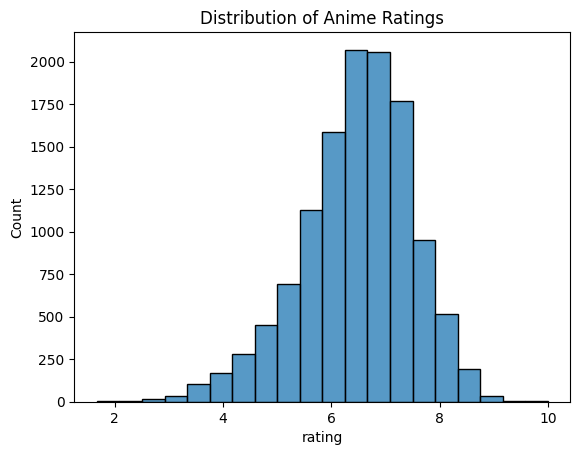

In [23]:
sns.histplot(anime['rating'], bins=20)
plt.title('Distribution of Anime Ratings')
plt.show()

Distribusi left-skewed dengan kebanyakan di rentang 6-7

Distribusi member anime

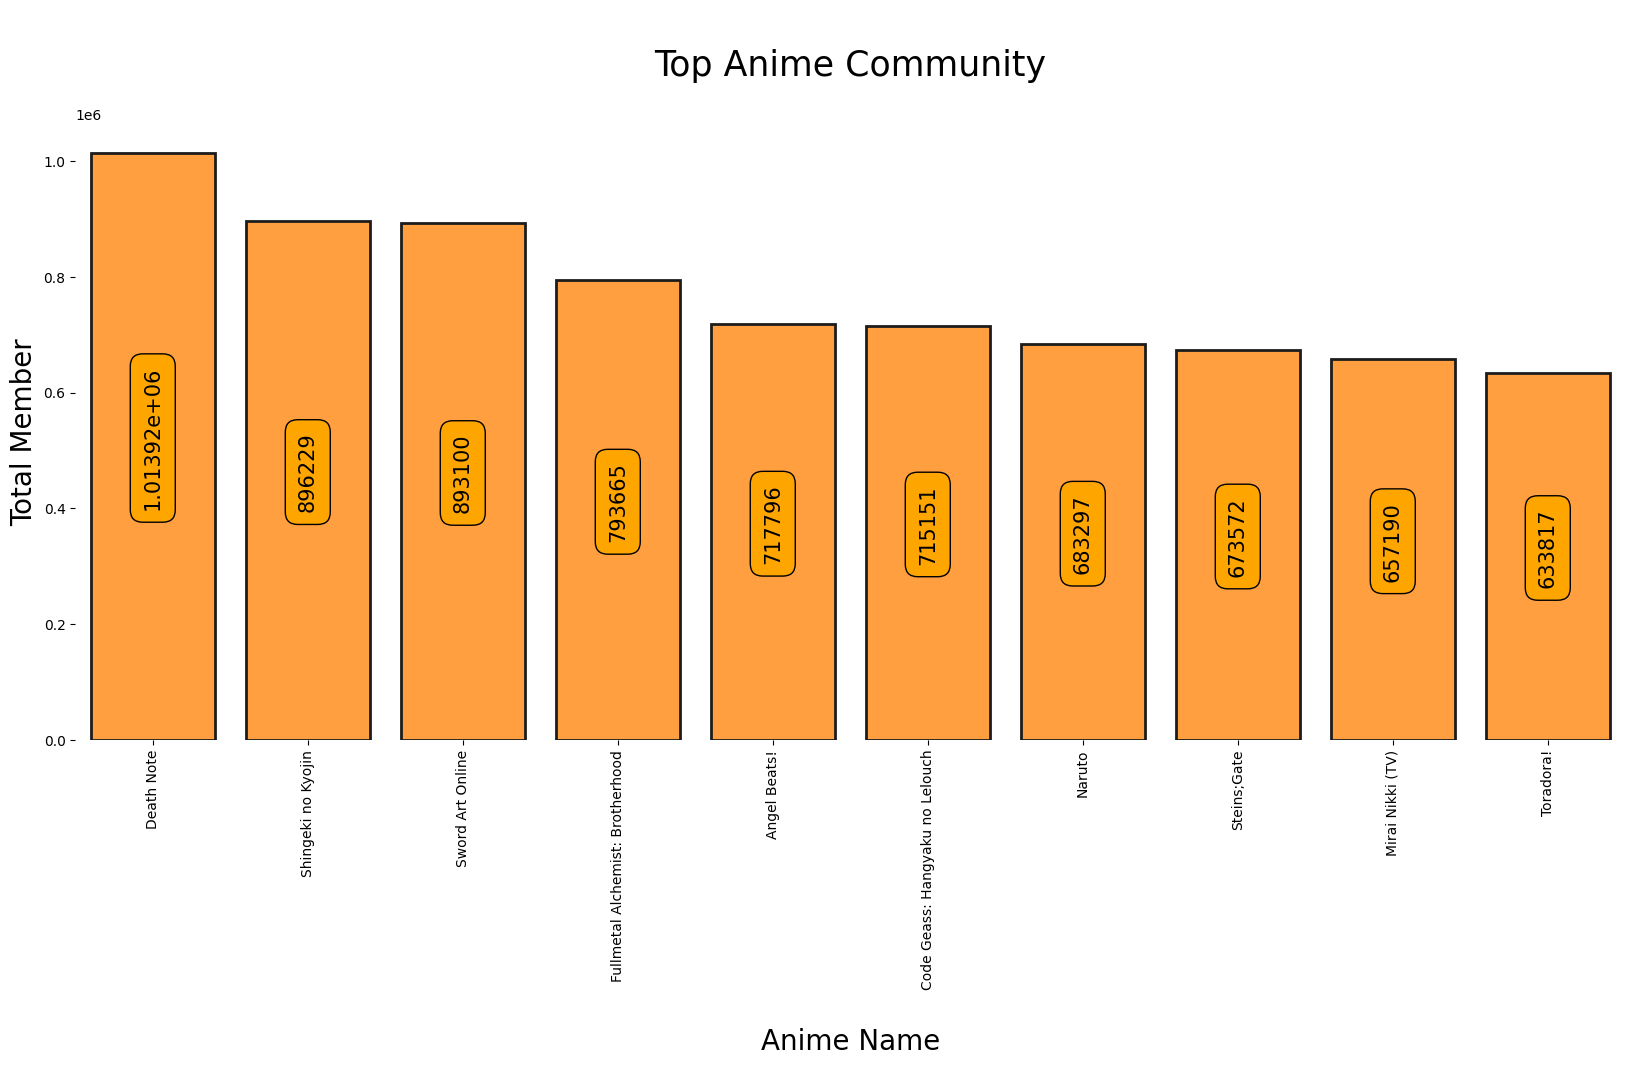

Labels: ['Death Note', 'Shingeki no Kyojin', 'Sword Art Online', 'Fullmetal Alchemist: Brotherhood', 'Angel Beats!', 'Code Geass: Hangyaku no Lelouch', 'Naruto', 'Steins;Gate', 'Mirai Nikki (TV)', 'Toradora!']
Data: [1013917, 896229, 893100, 793665, 717796, 715151, 683297, 673572, 657190, 633817]


In [149]:
# Salin dan urutkan data
top_anime = anime.copy()
top_anime = top_anime.dropna(subset=['name', 'members'])
top_anime_temp1 = top_anime.sort_values(["members"], ascending=False).head(10)

# Buat plot
plt.subplots(figsize=(20, 8))
p = sns.barplot(x=top_anime_temp1["name"], y=top_anime_temp1["members"],
                order=top_anime_temp1["name"], saturation=1,
                edgecolor="#1c1c1c", linewidth=2, color="#FF9F40")
p.axes.set_title("\nTop Anime Community\n", fontsize=25)
plt.ylabel("Total Member", fontsize=20)
plt.xlabel("\nAnime Name", fontsize=20)
plt.xticks(rotation=90)
for container in p.containers:
    p.bar_label(container, label_type="center", padding=6, size=15, color="black", rotation=90,
                bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "orange", "edgecolor": "black", "alpha": 1})
sns.despine(left=True, bottom=True)
plt.show()

# Cetak data untuk chart
print("Labels:", top_anime_temp1["name"].tolist())
print("Data:", top_anime_temp1["members"].tolist())

Anime dengan member komunitas terbanyak jatuh kepada 'Death Note' dengan jumlah member 1.013.917

Distribusi anime berdasarkan genre

<ipython-input-24-fdec46122d0c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index[:5], y=genre_counts.values[:5], palette='Set2')


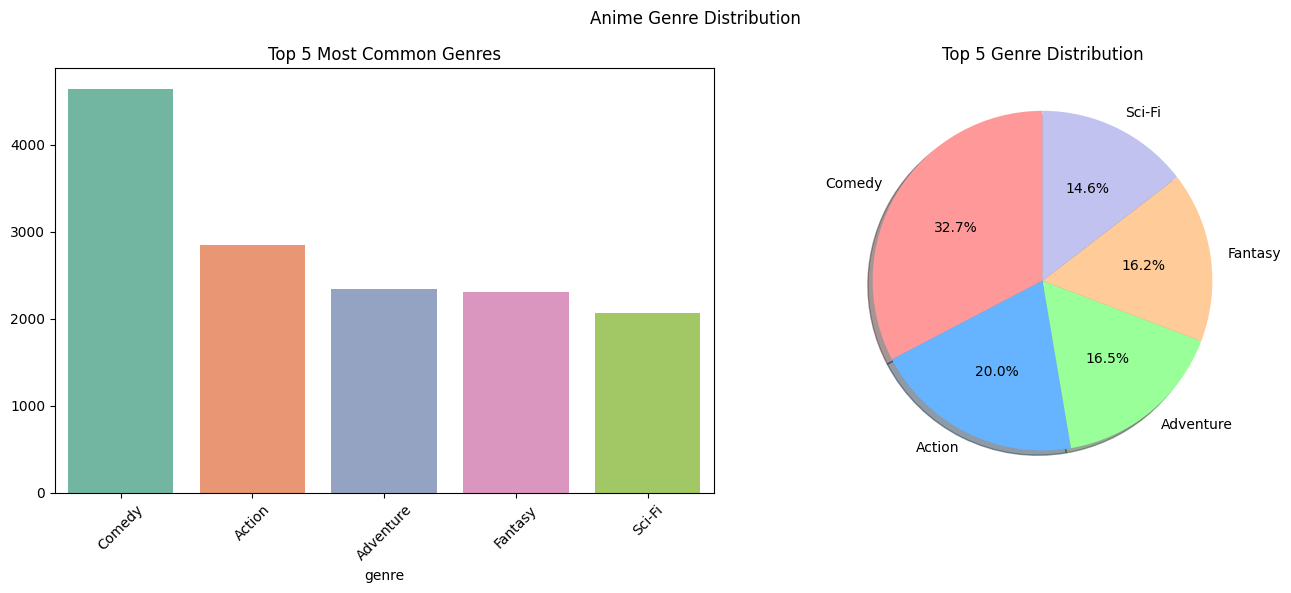

In [24]:
# Pisahkan genre-genre yang digabung menjadi list
anime_genres = anime[['name', 'genre']].copy()
anime_genres['genre'] = anime_genres['genre'].str.split(', ')

# Ubah format ke bentuk "long" (satu baris = satu genre)
anime_exploded = anime_genres.explode('genre')

# Hitung distribusi genre
genre_counts = anime_exploded['genre'].value_counts()

# Visualisasi
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.barplot(x=genre_counts.index[:5], y=genre_counts.values[:5], palette='Set2')
plt.xticks(rotation=45)
plt.title('Top 5 Most Common Genres')

plt.subplot(1,2,2)
plt.pie(genre_counts[:5], labels=genre_counts.index[:5], autopct='%1.1f%%', startangle=90, shadow=True,
        colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.title('Top 5 Genre Distribution')

plt.suptitle('Anime Genre Distribution')
plt.tight_layout()
plt.show()

Genre comedy memiliki anime terbanyak dengan jumlah 32.7%

Distribusi anime berdasarkan type

<ipython-input-25-8d07cdbdf8fc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = anime_type.index, y = anime_type.values, palette='Set3')


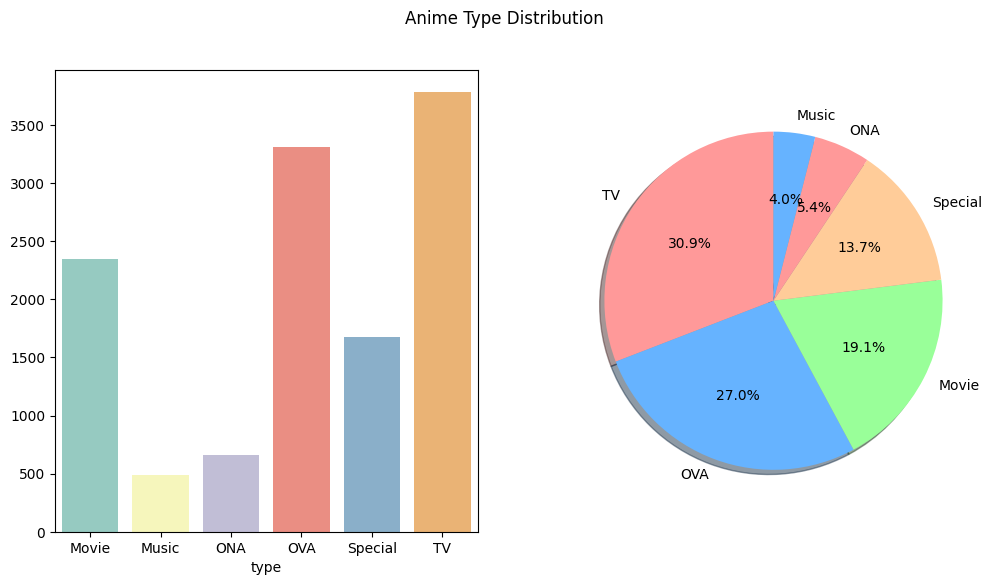

In [25]:
# DISPLAY DISTRIBUTION ANIME BY TYPE

anime_type = anime.groupby(by='type')['name'].count()
plt.figure(figsize=(12,6))

# VISUALIZE
plt.subplot(1,2,1)
sns.barplot(x = anime_type.index, y = anime_type.values, palette='Set3')

plt.subplot(1,2,2)
type_counts = anime['type'].value_counts()
plt.pie(type_counts, labels = type_counts.index, autopct='%1.1f%%', startangle=90, shadow=True, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])

plt.suptitle('Anime Type Distribution')
plt.show()

Tipe anime TV memiliki distribusi terbanyak dengan jumlah 31.1%

Top anime berdasarkan rating

<ipython-input-26-ae64d732a6a3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='name', data=top5_rating, palette='viridis')


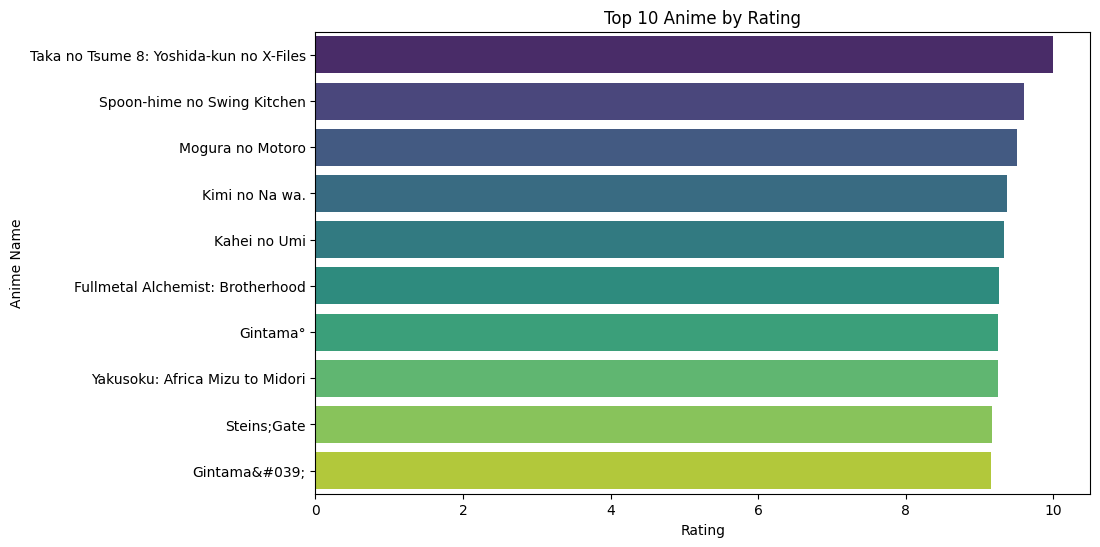

In [26]:
# Ambil 5 anime dengan rating tertinggi
top5_rating = anime.sort_values(by='rating', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='rating', y='name', data=top5_rating, palette='viridis')
plt.title('Top 10 Anime by Rating')
plt.xlabel('Rating')
plt.ylabel('Anime Name')
plt.show()

Anime terbaik berdasarkan rating adalah Taka no Tsume8: Yoshida-kun no X-Files dengan rating 10 diikuti dengan spoon-hime no swing kitchen pada urutan kedua





2. Rating dataset EDA

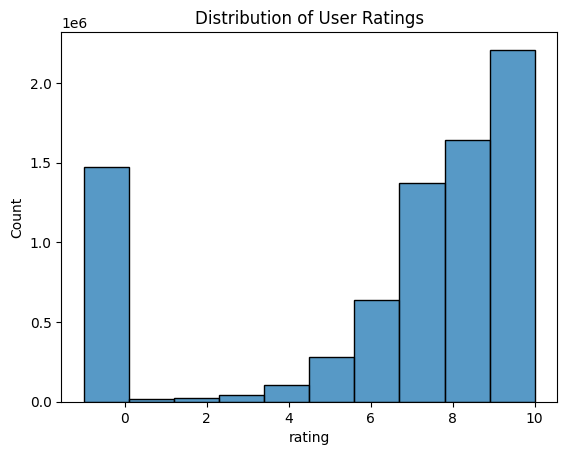

In [27]:
sns.histplot(rating['rating'], bins=10)
plt.title('Distribution of User Ratings')
plt.show()

Distribusi left-skewed dengan kebanyakan di rentang 7-8 dan terdapat outliers yaitu -1 yang nantinya akan di hilangkan

#Data Preparation

Data preprocessing akan dilakukan pada model masing-masing

## Data Cleaning

Melakukan penghapusan pada baris yang genre null dan mengisi type yang kosong dengan yang paling umum.

In [29]:
#Menghapus baris yang genrenya kosong
anime = anime[anime['genre'].notnull()]
#isi type kosong dengan yang paling umum
anime['type'].fillna(anime['type'].mode()[0], inplace=True)

#Drop baris dengan rating null
anime = anime.dropna(subset=["rating"])

<ipython-input-29-09e6c82b00a3>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  anime['type'].fillna(anime['type'].mode()[0], inplace=True)
<ipython-input-29-09e6c82b00a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime['type'].fillna(anime['type'].mode()[0], inplace=True)


drop duplikat

In [30]:
anime=anime.drop_duplicates()

drop null pada rating

In [31]:
#ganti -1 jadi NaN sebelumnya
rating.replace(-1, np.nan, inplace=True)
rating.dropna(inplace=True)

In [32]:
print(anime.isnull().sum())
print(rating.isnull().sum())



anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64
user_id     0
anime_id    0
rating      0
dtype: int64


Pada nama anime terdapat banyak simbol

In [33]:
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)

    return text

anime['name'] =anime['name'].apply(text_cleaning)

#Modelling

## Content Based Filtering

### TF-IDF Vectorizer

### Data preparation

In [120]:
# Salin fulldata untuk menghindari perubahan pada DataFrame asli
df_content = anime.copy()

# Pisahkan genre berdasarkan koma (dengan spasi opsional) dan gabungkan dengan spasi
df_content["genre"] = df_content["genre"].str.split(',').apply(lambda genres: ' '.join([g.strip().replace(' ', '_') for g in genres]))
  # Ubah "Drama, Romance" jadi "Drama Romance"


### TF-IDF Vectorizer

In [121]:
# Inisialisasi TfidfVectorizer untuk ekstraksi fitur genre
tfidf = TfidfVectorizer()


# Ubah genre menjadi matriks TF-IDF
tfidf_matrix = tfidf.fit_transform(df_content["genre"])  # Buat vektor numerik untuk genre
tfidf_matrix.shape

(12017, 44)

Jumlah genre sudah benar 44, (43 + 1 yaitu nama)

In [125]:
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.29453722, 0.3158063 , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.25133996, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

tabel berisi nama anime beserta genre berdasarkan TF-IDF yang telah diinisiasi.

In [126]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns = tfidf.get_feature_names_out(),
    index = df_content.name
)

,action,adventure,cars,comedy,dementia,demons,drama,ecchi,fantasy,fi,...,shounen_ai,slice_of_life,space,sports,super_power,supernatural,thriller,vampire,yaoi,yuri
name,,,,,,,,,,,,,,,,,,,,,
Kimi no Na wa.,0.00,0.00,0.00,0.00,0.00,0.00,0.44,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.55,0.00,0.00,0.00,0.00
Fullmetal Alchemist: Brotherhood,0.29,0.32,0.00,0.00,0.00,0.00,0.33,0.00,0.32,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Gintama°,0.25,0.00,0.00,0.20,0.00,0.00,0.00,0.00,0.00,0.28,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Steins;Gate,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.39,...,0.00,0.00,0.00,0.00,0.00,0.00,0.83,0.00,0.00,0.00
Gintama,0.25,0.00,0.00,0.20,0.00,0.00,0.00,0.00,0.00,0.28,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Toushindai My Lover: Minami tai Mecha-Minami,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Under World,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Violence Gekiga David no Hoshi,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [127]:
# Assuming you have your tfidf_matrix, tfidf, and df_content defined
# For demonstration purposes, let's create a dummy DataFrame:
data = {'col1': [1, 2, 3], 'col2': [4, 5, 6]}
df_tfidf_table = pd.DataFrame(data, index=['rowA', 'rowB', 'rowC'])

# Create a figure and an axes object
fig, ax = plt.subplots(figsize=(10, 5)) # Adjust figsize as needed

# Hide the axes (optional, but makes it look cleaner as just a table)
ax.axis('off')
ax.axis('tight')

# Create the table
table = ax.table(cellText=df_tfidf_table.values,
                 colLabels=df_tfidf_table.columns,
                 rowLabels=df_tfidf_table.index,
                 cellLoc='center',
                 loc='center')

# Adjust layout to prevent labels from overlapping
fig.tight_layout()

# Save the figure as an image
plt.savefig('tfidf_dataframe_table.png', dpi=300, bbox_inches='tight')
print("DataFrame saved as tfidf_dataframe_table.png")

# Close the plot to free up memory
plt.close(fig)

DataFrame saved as tfidf_dataframe_table.png


### Cosine Similarity

Pada proyek ini content based filtering akan digunakan cosine similarity untuk mencari kemiripan anime

In [128]:
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.14692967, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14692967, 1.        , 0.18089942, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.18089942, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

tabel berisi cosine similarity anime

In [129]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama anime
cosine_sim_df = pd.DataFrame(cosine_sim, index=df_content['name'], columns=df_content['name'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap anime
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (12017, 12017)


name,Ai,Seikimatsu★Darling,Sexy Commando Gaiden: Sugoiyo!! Masaru-san,Sidonia no Kishi: Daikyuu Wakusei Seneki,Soul Eater NOT!
name,,,,,
Kinnikuman (1984),0.00,0.08,0.31,0.12,0.46
AKB48 Stage Fighter,0.00,0.00,0.00,0.29,0.36
MEMORiES MELODiES,0.00,0.00,0.00,0.00,0.00
Genkichi Jiisan to Kogitsune,0.00,0.25,0.00,0.00,0.00
Anime Tenchou,0.00,0.00,0.00,0.14,0.18
Pankunchi,0.00,0.00,0.00,0.00,0.00
Kyutai Panic Adventure Returns!,0.00,0.00,0.22,0.13,0.38
Meitantei Holmes,0.00,0.09,0.11,0.00,0.11
Blood Lad,0.00,0.05,0.06,0.28,0.33


### Test Sistem Rekomendasi

In [143]:
def recommendations_content(name, similarity_data=cosine_sim_df, items=df_content[['name','genre', 'rating']], k=10):

    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,name].to_numpy().argpartition(range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop name agar nama anime yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(name, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [139]:
df_content[df_content['name']=="Naruto"]

,anime_id,name,genre,type,episodes,rating,members
841,20,Naruto,Action Comedy Martial_Arts Shounen Super_Power,TV,220,7.81,683297


In [144]:
recommendations_content('Naruto')

,name,genre,rating
0,Naruto x UT,Action Comedy Martial_Arts Shounen Super_Power,7.58
1,Naruto: Shippuuden,Action Comedy Martial_Arts Shounen Super_Power,7.94
2,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,Action Comedy Martial_Arts Shounen Super_Power,7.50
3,Boruto: Naruto the Movie,Action Comedy Martial_Arts Shounen Super_Power,8.03
4,Naruto Shippuuden: Sunny Side Battle,Action Comedy Martial_Arts Shounen Super_Power,7.26
5,Naruto: Shippuuden Movie 4 - The Lost Tower,Action Comedy Martial_Arts Shounen Super_Power,7.53
6,Naruto Soyokazeden Movie: Naruto to Mashin to ...,Action Comedy Martial_Arts Shounen Super_Power,7.11
7,Boruto: Naruto the Movie - Naruto ga Hokage ni...,Action Comedy Martial_Arts Shounen Super_Power,7.68
8,Rekka no Honoo,Action Adventure Martial_Arts Shounen Super_Power,7.44
9,Kyutai Panic Adventure!,Action Martial_Arts Shounen Super_Power,5.21


In [141]:
df_content[df_content['name']=="Doraemon"]

,anime_id,name,genre,type,episodes,rating,members
1587,501,Doraemon,Adventure Comedy Fantasy Kids Shounen,TV,26,7.49,9366


In [145]:
recommendations_content('Doraemon')

,name,genre,rating
0,Doraemon Movie 10: Nobita no Nippon Tanjou,Adventure Comedy Fantasy Kids Shounen,7.33
1,Doraemon: Its Summer!,Adventure Comedy Fantasy Kids Shounen,6.63
2,Doraemon Movie 12: Nobita no Dorabian Nights,Adventure Comedy Fantasy Kids Shounen,7.37
3,Doraemon: Ganbare! Gian!!,Adventure Comedy Fantasy Kids Shounen,6.80
4,Doraemon Movie 08: Nobita to Ryuu no Kishi,Adventure Comedy Fantasy Kids Shounen,7.27
5,Doraemon Movie 33: Nobita no Himitsu Dougu Museum,Adventure Comedy Fantasy Kids Shounen,7.47
6,Doraemon Movie 07: Nobita to Tetsujin Heidan,Adventure Comedy Fantasy Kids Shounen,7.46
7,Doraemon: Its Spring!,Adventure Comedy Fantasy Kids Shounen,6.67
8,Doraemon Movie 23: Nobita to Robot Kingdom,Adventure Comedy Fantasy Kids Shounen,7.33
9,Doraemon: Treasure of the Shinugumi Mountain,Adventure Comedy Fantasy Kids Shounen,6.74


Dari hasil rekomendasi berdasarkan genre berhasil memberikan rekomendasi sebanyak 5 rekomendasi

## Collaborative Filtering

### Data preparation

Dikarenakan data yang sangat besar kita akan mengambil 500 user unik saja

In [151]:
sampled_users = rating['user_id'].drop_duplicates().sample(n=500, random_state=42)
df_collab = rating[rating['user_id'].isin(sampled_users)]

In [60]:
df_collab.shape

(44111, 3)

In [61]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = df_collab['user_id'].unique().tolist()
print('list user_id: ', user_ids)

# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list user_id:  [459, 470, 486, 665, 741, 883, 888, 948, 1239, 1295, 1537, 1589, 1617, 1805, 2192, 2495, 3086, 3179, 3237, 3397, 3506, 3560, 3655, 3734, 3946, 3951, 4049, 4320, 4614, 4671, 4904, 4954, 5166, 5395, 5446, 5848, 5873, 5937, 6083, 6403, 6420, 6430, 6698, 6734, 6850, 6947, 7042, 7190, 7671, 7864, 7877, 7885, 7953, 8008, 8030, 8164, 8288, 8416, 8474, 8640, 8643, 8825, 8870, 9001, 9239, 9571, 9575, 9576, 9644, 9936, 10056, 10261, 10442, 10569, 10730, 10808, 11149, 11158, 11188, 11228, 11265, 11314, 11698, 12293, 12513, 12607, 12638, 12707, 12709, 12821, 13385, 13524, 13736, 13767, 13839, 13859, 13873, 13949, 13961, 14077, 14456, 14654, 14771, 14776, 15189, 15190, 15365, 15446, 15561, 15655, 15818, 15856, 16050, 16056, 16091, 16124, 16701, 16743, 16993, 17007, 17017, 17380, 17512, 17864, 18094, 18178, 18192, 18372, 18816, 19302, 19335, 19345, 19379, 19386, 19696, 19782, 19884, 19922, 20081, 20113, 20277, 20435, 20496, 20630, 20815, 20837, 20903, 21260, 21367, 21415, 21446, 21538

In [152]:
# Mengubah anime_id menjadi list tanpa nilai yang sama
anime_ids = df_collab['anime_id'].unique().tolist()

# Melakukan proses encoding anime_id
anime_to_anime_encoded = {x: i for i, x in enumerate(anime_ids)}

# Melakukan proses encoding angka ke anime_id
anime_encoded_to_anime = {i: x for i, x in enumerate(anime_ids)}

In [153]:
# Mapping userID ke dataframe user
df_collab['user'] = df_collab['user_id'].map(user_to_user_encoded)

# Mapping placeID ke dataframe anime
df_collab['anime'] = df_collab['anime_id'].map(anime_to_anime_encoded)

<ipython-input-153-406e2a3e01cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collab['user'] = df_collab['user_id'].map(user_to_user_encoded)
<ipython-input-153-406e2a3e01cf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collab['anime'] = df_collab['anime_id'].map(anime_to_anime_encoded)


In [64]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah resto
num_anime = len(anime_encoded_to_anime)
print(num_anime)

# Mengubah rating menjadi nilai float
df_collab['rating'] = df_collab['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = df_collab['rating'].min()

# Nilai maksimal rating
max_rating = df_collab['rating'].max()

print('Number of User: {}, Number of anime: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_anime, min_rating, max_rating
))

500
4312
Number of User: 500, Number of anime: 4312, Min Rating: 1.0, Max Rating: 10.0


<ipython-input-64-01d4c417b815>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_collab['rating'] = df_collab['rating'].values.astype(np.float32)


### Split dataset

In [66]:
# Mengacak dataset
df_collab = df_collab.sample(frac=1, random_state=42)
df_collab

,user_id,anime_id,rating,user,anime
2157716,20903,23283,8.00,146,107
1531247,14776,30503,8.00,103,1182
3578635,33184,10087,9.00,227,37
5614824,52724,853,9.00,354,196
6669352,61510,3228,8.00,406,276
...,...,...,...,...,...
1014039,9575,903,9.00,66,207
7689329,72245,20,8.00,487,122
2526007,23975,30901,5.00,172,3334
7384332,68828,27899,9.00,456,783


In [67]:
# Membuat variabel x untuk mencocokkan data user dan resto menjadi satu value
x = df_collab[['user', 'anime']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df_collab['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df_collab.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 146  107]
 [ 103 1182]
 [ 227   37]
 ...
 [ 172 3334]
 [ 456  783]
 [ 201 1337]] [0.7777778  0.7777778  0.8888889  ... 0.44444445 0.8888889  1.        ]


### Training

In [70]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_anime, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_anime = num_anime
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.anime_embedding = layers.Embedding( # layer embeddings anime
        num_anime,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.anime_bias = layers.Embedding(num_anime, 1) # layer embedding anime bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    anime_vector = self.anime_embedding(inputs[:, 1]) # memanggil layer embedding 3
    anime_bias = self.anime_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_anime = tf.tensordot(user_vector, anime_vector, 2)

    x = dot_user_anime + user_bias + anime_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [71]:
model = RecommenderNet(num_users, num_anime, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [72]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 10,
    validation_data = (x_val, y_val)
)

Epoch 1/10
4411/4411 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.6259 - root_mean_squared_error: 0.2445 - val_loss: 0.5449 - val_root_mean_squared_error: 0.1552
Epoch 2/10
4411/4411 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.5383 - root_mean_squared_error: 0.1475 - val_loss: 0.5384 - val_root_mean_squared_error: 0.1477
Epoch 3/10
4411/4411 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.5316 - root_mean_squared_error: 0.1393 - val_loss: 0.5355 - val_root_mean_squared_error: 0.1443
Epoch 4/10
4411/4411 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.5282 - root_mean_squared_error: 0.1360 - val_loss: 0.5335 - val_root_mean_squared_error: 0.1421
Epoch 5/10
4411/4411 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.5241 - root_mean_squared_error: 0.1318 - val_loss: 0.5332 - val_root_mean_squared_error: 0.1421
Epoch 6/10
4411/4411 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.5262 - root_mean_squared_error: 0.1310 - val_loss: 0.5325 - val_root_mean_squared_error: 0.1411
Epoch 7/10
4411/4411 ━━━━━━━━━━━━━

### Visualisasi Metrik

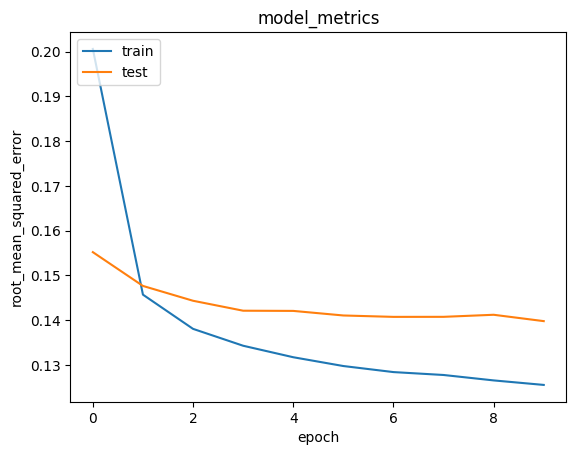

In [73]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Rekomendasi Anime

In [74]:
anime_df = anime.copy()
df = rating
# Mengambil sample user and validate
user_id = df_collab['user_id'].sample(1).iloc[0]
if user_id not in user_to_user_encoded:
    raise ValueError(f"User ID {user_id} not found in user_to_user_encoded mapping. Please check your data.")

# Get anime watched by the user
anime_watched_by_user = df_collab[df_collab['user_id'] == user_id]

# Get anime not watched by the user
anime_not_watched = anime_df[~anime_df['anime_id'].isin(anime_watched_by_user['anime_id'].values)]['anime_id']
anime_not_watched = list(set(anime_not_watched).intersection(set(anime_to_anime_encoded.keys())))

# Convert anime_not_watched to encoded values
anime_not_watched_encoded = [anime_to_anime_encoded[x] for x in anime_not_watched]

# Get encoded user ID
user_encoder = user_to_user_encoded[user_id]  #agar tidak none

# Create user_anime_array with proper shape and dtype
user_anime_array = np.array(
    [[user_encoder, anime_id] for anime_id in anime_not_watched_encoded],
    dtype=np.int32  # Ensure integer dtype
)

# Verify no None values
if np.any(user_anime_array == None):
    raise ValueError("user_anime_array contains None values. Check user_to_user_encoded and anime_to_anime_encoded.")
print(user_anime_array)

[[ 274 2515]
 [ 274 1722]
 [ 274  738]
 ...
 [ 274 3499]
 [ 274 3096]
 [ 274 3357]]


In [75]:
# Predict ratings
ratings = model.predict(user_anime_array).flatten()

# Get top 10 recommendations
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_anime_ids = [
    anime_encoded_to_anime[anime_not_watched_encoded[x]] for x in top_ratings_indices
]

# Print recommendations
print(f'Showing recommendations for user: {user_id}')
print('===' * 9)
print('Anime with high ratings from user')
print('----' * 8)

top_anime_user = (
    anime_watched_by_user.sort_values(by='rating', ascending=False)
    .head(5)
    .anime_id.values
)

anime_df_rows = anime_df[anime_df['anime_id'].isin(top_anime_user)]
for row in anime_df_rows.itertuples():
    print(f'{row.name}: {row.genre}')

print('----' * 8)
print('Top 10 anime recommendations')
print('----' * 8)

recommended_anime = anime_df[anime_df['anime_id'].isin(recommended_anime_ids)]
for row in recommended_anime.itertuples():
    print(f'{row.name}: {row.genre}')

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Showing recommendations for user: 40474
Anime with high ratings from user
--------------------------------
Shokugeki no Souma: Ecchi, School, Shounen
Bakemonogatari: Mystery, Romance, Supernatural, Vampire
Kaichou wa Maid-sama!: Comedy, Romance, School, Shoujo
Nisemonogatari: Comedy, Mystery, Supernatural
Sword Art Online: Action, Adventure, Fantasy, Game, Romance
--------------------------------
Top 10 anime recommendations
--------------------------------
Hunter x Hunter (2011): Action, Adventure, Shounen, Super Power
Gintama: Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen
Code Geass: Hangyaku no Lelouch R2: Action, Drama, Mecha, Military, Sci-Fi, Super Power
Code Geass: Hangyaku no Lelouch: Action, Mecha, Military, School, Sci-Fi, Super Power
Hajime no Ippo: New Challenger: Comedy, Drama, Shounen, Sports
Monster: Drama, Horror, Mystery, Police, Psychological, Seinen, Thriller
Kara no Kyoukai 5: Mujun Rasen: Action, Drama, Mystery,

# Referensi

[1] Gufy. How Netflix’s Recommendation Engine Drives Success. Diakses pada 1 Juni 2025 dari https://www.gufy.com.au/post/netflixs-recommendation-engine#:~:text=In%20the%20world%20of%20streaming,also%20significantly%20improved%20user%20retention.

[2] MyAnimeList Stats. (2024). Diakses pada 1 Juni 2025 dari https://myanimelist.net/topanime.php?limit=20000

[3] Ricci, F., Rokach, L., & Shapira, B. (2011). Recommender Systems Handbook. Springer.

[4] Dicoding. Diakses pada 1 Juni 2025 dari https://www.dicoding.com/academies/319/corridor